# IMPORTANDO BIBLIOTECAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import kagglehub
from kagglehub import KaggleDatasetAdapter
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

file_path = "vgsales.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "anandshaw2001/video-game-sales",
  file_path
)

/home/nicollas/miniconda3/envs/videogame_sales/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# VISÃO GERAL DO DATASET

In [66]:
df.columns = df.columns.str.lower()
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.year
df = df[df['year'] <= 2016]

df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
print(df.shape) #Número de linhas e colunas do arquivo
print(f"\nTipos dos dados:\n{df.dtypes}") #Tipos de dados
print(f"\nO dataset vai de {int(df['year'].min())} até {int(df['year'].max())}")



(16598, 11)

Tipos dos dados:
rank              int64
name             object
platform         object
year            float64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

O dataset vai de 1980 até 2020


In [5]:
df[df.duplicated()] #Verificando se há valores duplicados

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales


In [6]:
print(f"\nValores inválidos por cluna:\n{df.isna().sum()}") # Verificando valores inválidos por coluna
print(f"\nNúmero de células NA: {df.isna().sum().sum()}")
print(f"Porcentagem de células que faltam: {round(df.isna().sum().sum() / df.size * 100, 1)}")


Valores inválidos por cluna:
rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

Número de células NA: 329
Porcentagem de células que faltam: 0.2


In [7]:
df.describe(include="all")

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


# ANÁLISE DESCRITIVA
Aqui, utilizaremos técnicas estatísticas, como tabela de frequências, histogramas e gráficos de barras, para compreender os dados que estão sendo estudados.

Distribuição de frequência

faremos uma análise, com base nas variáveis

Quantitativas: Contínuas e Discretas

Contínuas: total_sales(mil) na_sales(mil) jp_sales(mil) 	pal_sales(mil) other_sales(mil)

Qualitativas: Nominais e Ordinais

## FREQUÊNCIA

### QUANTITATIVAS

In [8]:
num_cols = df.select_dtypes(include="float64").columns
cat_cols = df.select_dtypes(include="object").columns

df[num_cols].describe()

,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:

freq_table = pd.DataFrame({
    'freq_abs' : df['year'].value_counts(),
    'freq_rel' : df['year'].value_counts(normalize=True) * 100
}).sort_index(ascending=False).reset_index()

freq_table

,year,freq_abs,freq_rel
0,2020.0,1,0.006125
1,2017.0,3,0.018374
2,2016.0,344,2.106939
3,2015.0,614,3.760642
4,2014.0,582,3.564648
5,2013.0,546,3.344154
6,2012.0,657,4.024009
7,2011.0,1139,6.976174
8,2010.0,1259,7.711153
9,2009.0,1431,8.764623


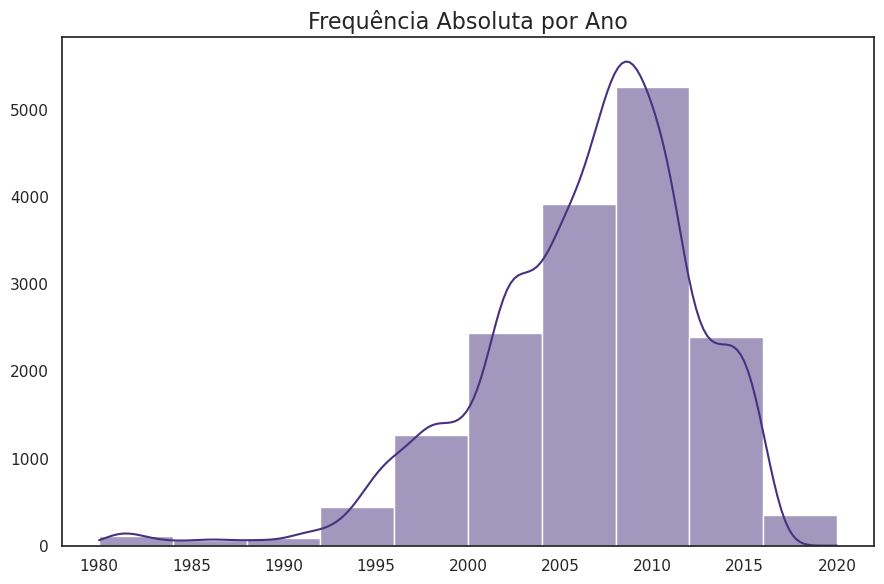

In [10]:
plt.figure(figsize=(9,6), dpi=100)
top10 = freq_table['year'].iloc[:11].tolist()

sns.set_theme(style="white", palette="viridis")
sns.histplot(df['year'], kde=True, bins=10)

plt.ylabel("")
plt.xlabel("")
plt.title('Frequência Absoluta por Ano', fontsize=16)


plt.tight_layout()
plt.show()

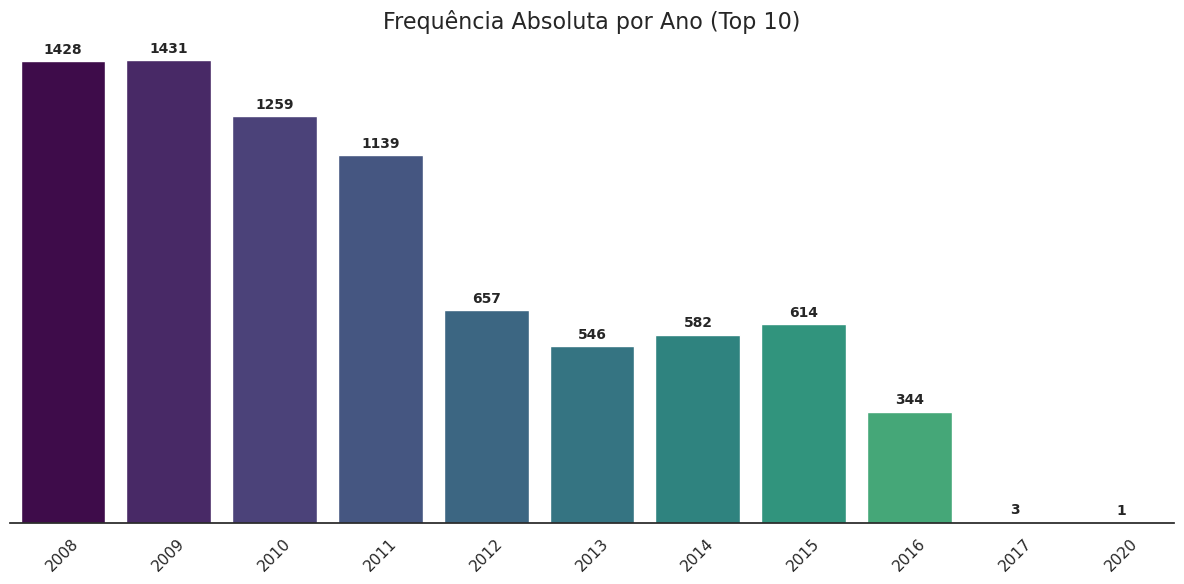

In [11]:
plt.figure(figsize=(12, 6))
freq_table['year'] = freq_table['year'].astype(int)

sns.set_theme(style="white")

ax = sns.barplot(data=freq_table.loc[freq_table.year.isin(top10)],
            x='year',
            y='freq_abs',
            palette='viridis',
            hue='year',
            legend=False
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True)

ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Frequência Absoluta por Ano (Top 10)', fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_624/2416006469.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(


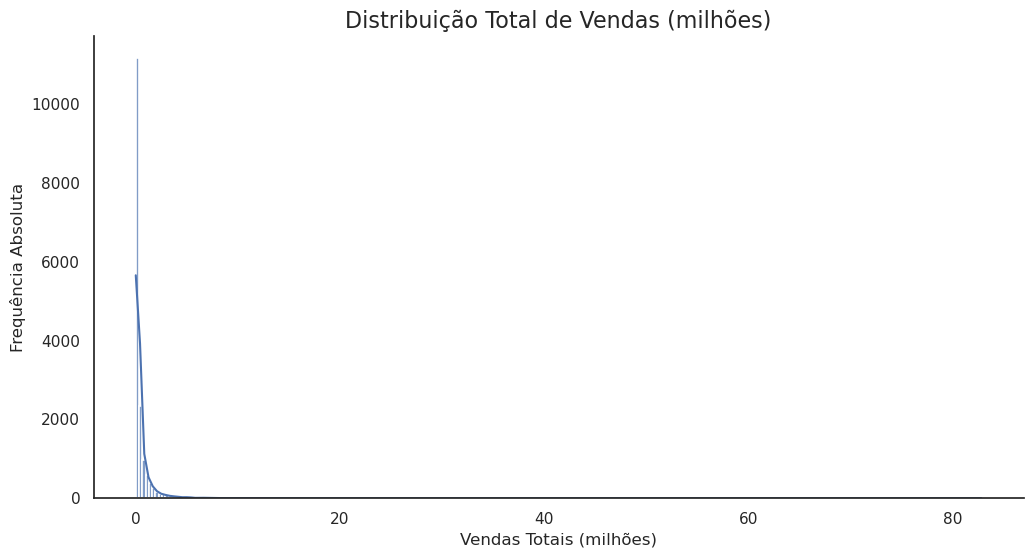

In [12]:
plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df['global_sales'],
    kde=True,
    palette='viridis',
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Distribuição Total de Vendas (milhões)', fontsize=16)
plt.xlabel('Vendas Totais (milhões)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)

plt.show()

/tmp/ipykernel_624/740366371.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(


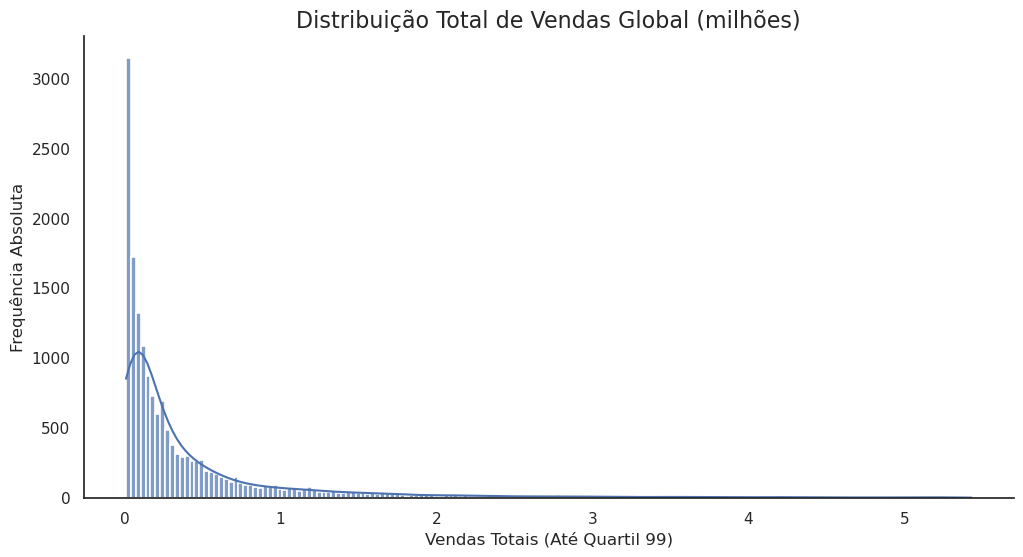

'sns.histplot(df[df["global_sales"] <= q99_total]["global_sales"])\nplt.xlabel("total_sales (até p99)")\nplt.show()'

In [13]:
q99_total = df["global_sales"].quantile(0.99)

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df[df["global_sales"] <= q99_total]["global_sales"],
    kde=True,
    palette='viridis',
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Distribuição Total de Vendas Global (milhões)', fontsize=16)
plt.xlabel('Vendas Totais (Até Quartil 99)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)

plt.show()

"""sns.histplot(df[df["global_sales"] <= q99_total]["global_sales"])
plt.xlabel("total_sales (até p99)")
plt.show()"""

/tmp/ipykernel_624/1271342516.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(


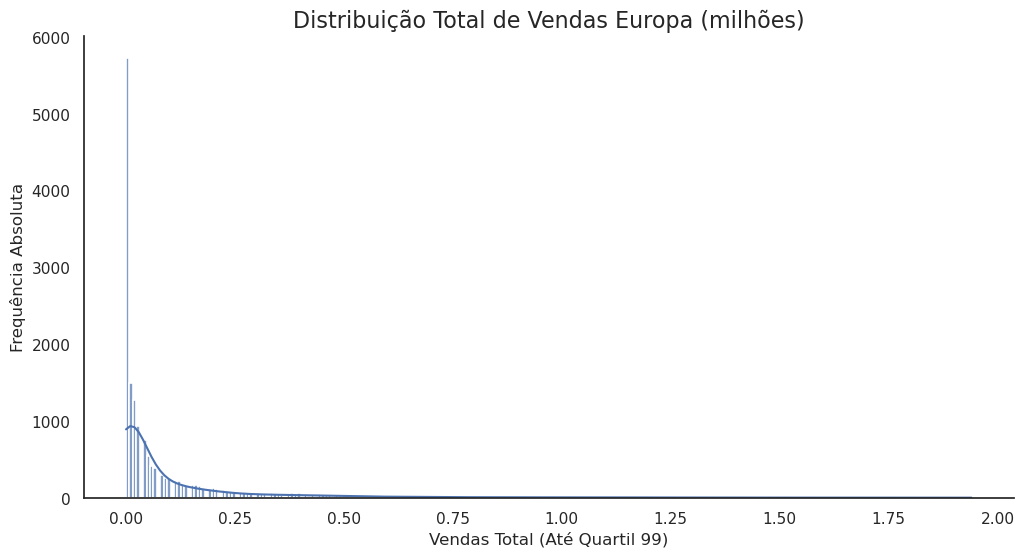

'sns.histplot(df[df["pal_sales(mil)"] <= q99_na]["pal_sales(mil)"])\nplt.xlabel("pal_sales (até p99)")\nplt.show()'

In [14]:
q99_eu = df["eu_sales"].quantile(0.99)

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df[df["eu_sales"] <= q99_eu]["eu_sales"],
    kde=True,
    palette='viridis',
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Distribuição Total de Vendas Europa (milhões)', fontsize=16)
plt.xlabel('Vendas Total (Até Quartil 99)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)

plt.show()

"""sns.histplot(df[df["pal_sales(mil)"] <= q99_na]["pal_sales(mil)"])
plt.xlabel("pal_sales (até p99)")
plt.show()"""

/tmp/ipykernel_624/4080621688.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(


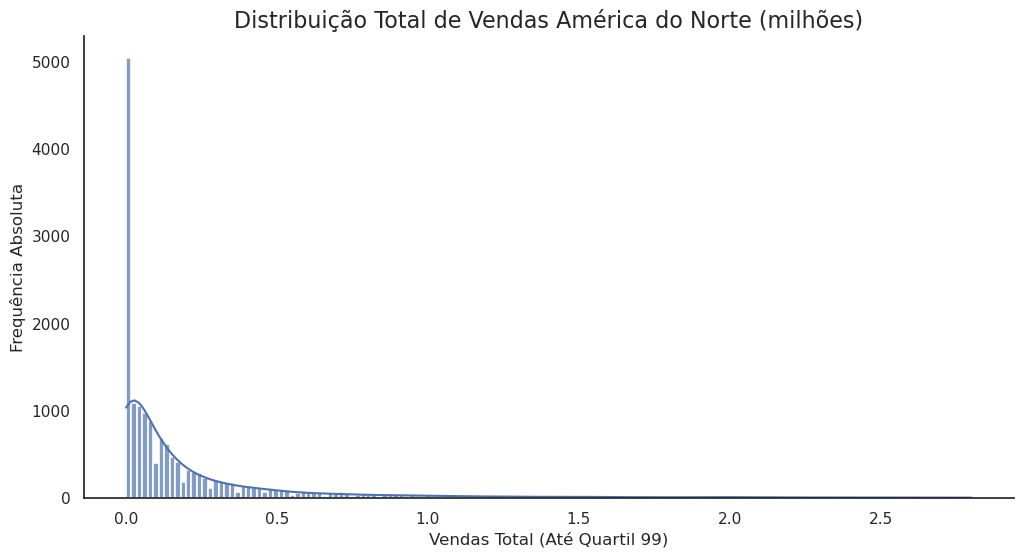

In [15]:
q99_na = df["na_sales"].quantile(0.99)

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df[df["na_sales"] <= q99_na]["na_sales"],
    kde=True,
    palette='viridis',
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Distribuição Total de Vendas América do Norte (milhões)', fontsize=16)
plt.xlabel('Vendas Total (Até Quartil 99)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)

plt.show()

/tmp/ipykernel_624/1355226482.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(


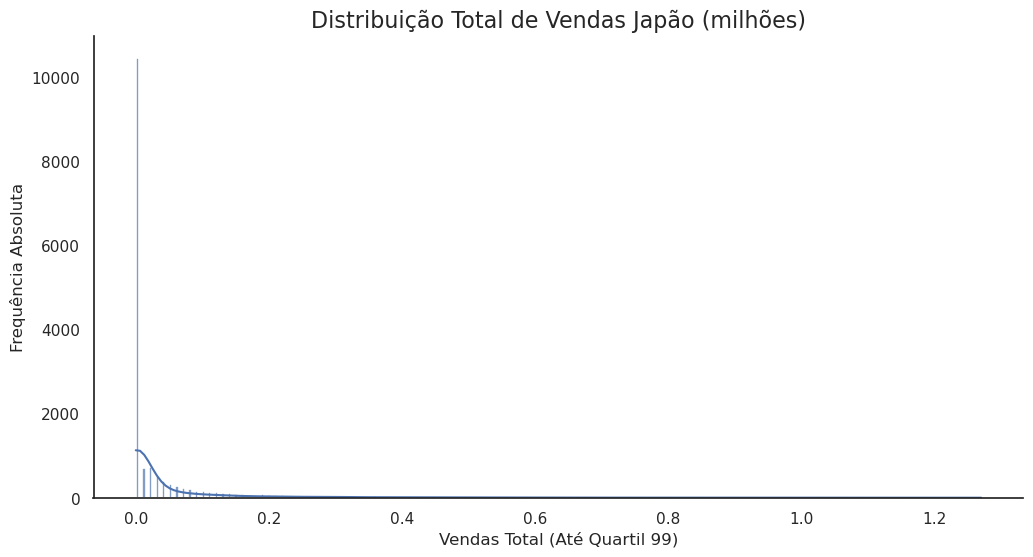

In [16]:
q99_jp = df["jp_sales"].quantile(0.99)

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df[df["jp_sales"] <= q99_jp]["jp_sales"],
    kde=True,
    palette='viridis',
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Distribuição Total de Vendas Japão (milhões)', fontsize=16)
plt.xlabel('Vendas Total (Até Quartil 99)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)

plt.show()

/tmp/ipykernel_624/401906888.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(


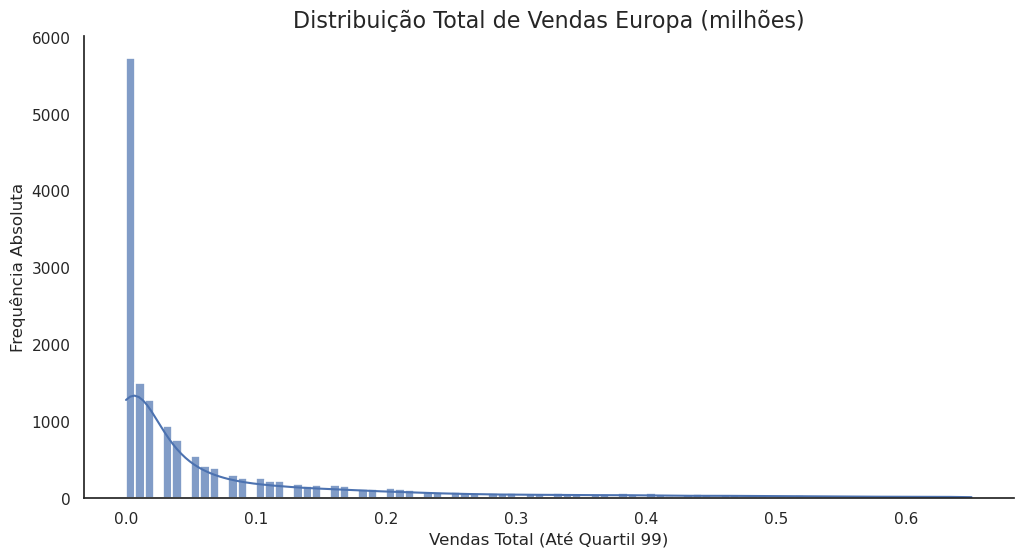

In [17]:
q99_other = df["other_sales"].quantile(0.99)

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df[df["eu_sales"] <= q99_other]["eu_sales"],
    kde=True,
    palette='viridis',
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Distribuição Total de Vendas Europa (milhões)', fontsize=16)
plt.xlabel('Vendas Total (Até Quartil 99)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)

plt.show()

### QUALITATIVAS

In [18]:
freq_names = pd.DataFrame({
    "freq_abs":df['name'].value_counts()
}).reset_index().sort_values(by=['freq_abs'], ascending=False)

freq_names

,name,freq_abs
0,Need for Speed: Most Wanted,12
1,LEGO Marvel Super Heroes,9
2,Ratatouille,9
3,Madden NFL 07,9
4,FIFA 14,9
...,...,...
11488,Afrika,1
11489,Blue Dragon Plus,1
11490,Ninja Gaiden: Dragon Sword,1
11491,Digimon World Re:Digitize,1


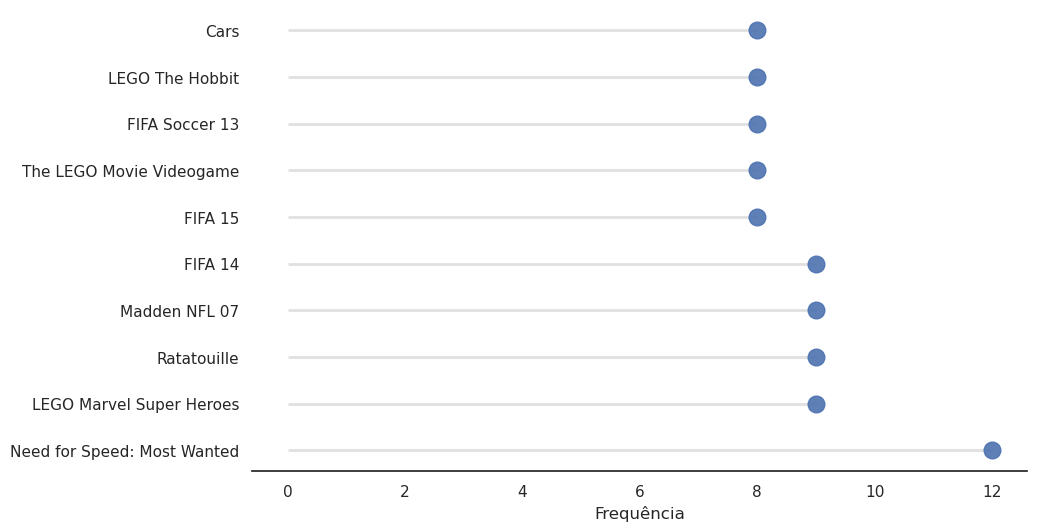

In [19]:
top10_names = freq_names[:10]
my_range=range(len(top10_names.index))

plt.figure(figsize=(10, 6))
ax = plt.gca()

plt.hlines(y=top10_names["name"], xmin=0, xmax=top10_names['freq_abs'], color='lightgray', linewidth=2, alpha=0.7)

plt.plot(top10_names['freq_abs'], my_range, "o", markersize=12, alpha=0.9)

sns.despine(left=True, bottom=False)

plt.yticks(my_range, top10_names['name'])
plt.xlabel('Frequência')
plt.ylabel('')

plt.show()

In [20]:
print(df['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


<BarContainer object of 5 artists>

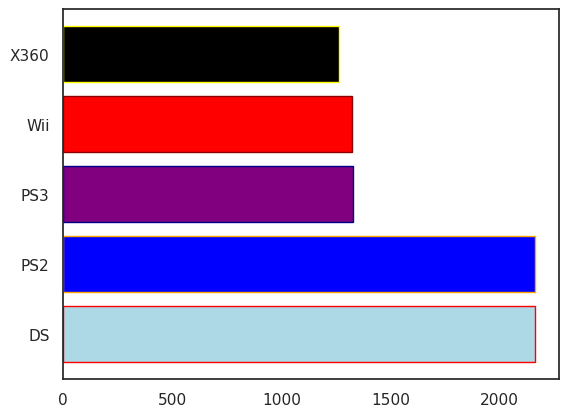

In [21]:
console_freq = pd.DataFrame({
    "frequency": df['platform'].value_counts(),
    "relative_frequency": df['platform'].value_counts(normalize=True) * 100
}
).sort_values(by=['frequency'], ascending=False).reset_index()

console_5 = console_freq[:5]

color = ['lightblue', 'blue', 'purple', 'red', 'black']
edgecolor = ['red', 'orange', 'darkblue', 'darkred', 'yellow']

plt.barh(y=console_5['platform'], width=console_5['frequency'], color=color, edgecolor=edgecolor)

In [22]:
console_5 = console_freq[:5]
console_5.head()

,platform,frequency,relative_frequency
0,DS,2163,13.031691
1,PS2,2161,13.019641
2,PS3,1329,8.006989
3,Wii,1325,7.982890
4,X360,1265,7.621400


In [72]:
fig = go.Figure(go.Barpolar(
    r=console_5['frequency'],
    theta=console_5['platform'],
    marker_color=console_5['frequency'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.85
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0, console_5['frequency'].max() * 1.1]
        )
    )
)

fig.show()


In [ ]:
freq_genres = pd.DataFrame({
    "frequency": df['genre'].value_counts(),
    "rel_frequency" : df['genre'].value_counts(normalize=True) * 100
}).sort_values(by='frequency', ascending=False).reset_index()

freq_genres.head(10)

,genre,frequency,rel_frequency
0,Action,2839,15.003699
1,Sports,2597,13.724765
2,Misc,2004,10.590847
3,Adventure,1893,10.004228
4,Role-Playing,1491,7.879717
5,Shooter,1485,7.848008
6,Racing,1431,7.562626
7,Simulation,1121,5.924321
8,Platform,951,5.025896
9,Fighting,871,4.603107


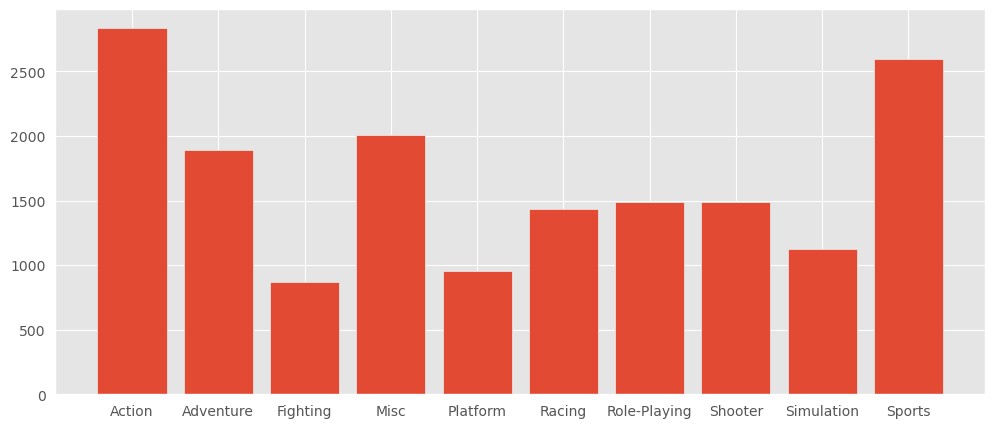

In [ ]:
genres_top10 = freq_genres[:10].sort_values(by='genre')

plt.figure(figsize=(12, 5))
plt.bar(x = genres_top10['genre'], height=genres_top10['frequency'])

plt.show()

In [ ]:
publisher_freq = pd.DataFrame({
    "frequency": df['publisher'].value_counts(),
    "rel_frequency": df['publisher'].value_counts(normalize=True) * 100
}).sort_values(by='frequency', ascending=False).reset_index()
publisher_freq.head()

,publisher,frequency,rel_frequency
0,Activision,1044,5.517387
1,Ubisoft,1012,5.348272
2,Electronic Arts,843,4.455132
3,Konami,769,4.064052
4,THQ,726,3.836804


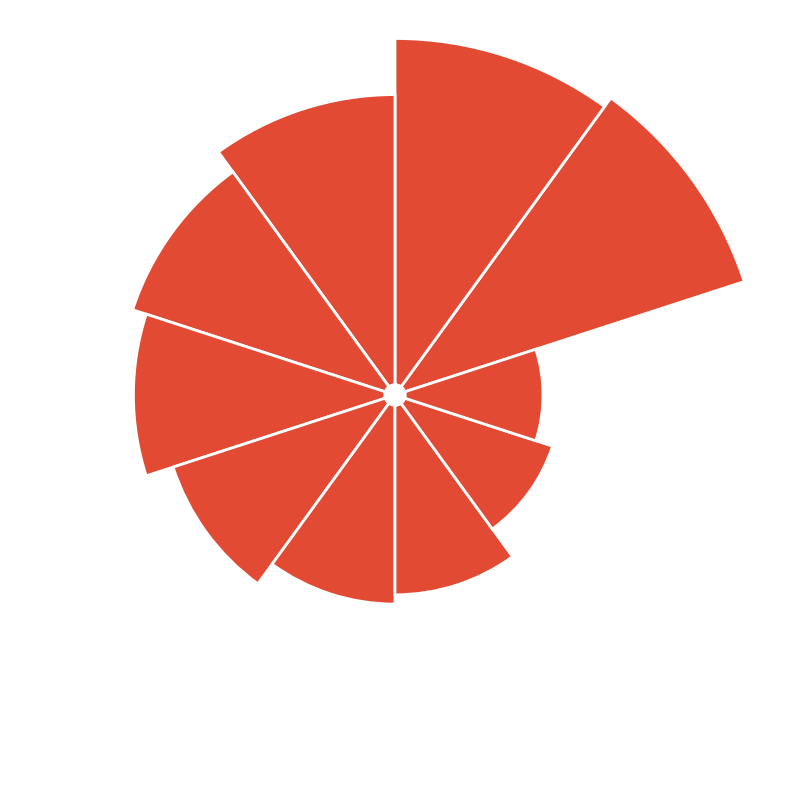

In [ ]:
publisher_top10 = publisher_freq[:10]

# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = publisher_top10['frequency'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * publisher_top10.frequency + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(publisher_top10.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(publisher_top10.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white")

## MEDIDAS DE TENDÊNCIA CENTRAL

### MÉDIA

In [ ]:
sales_mean = pd.DataFrame({
    'region': ['total_sales', 'jp_sales', 'pal_sales', 'na_sales', 'other_sales'],
    'mean': [
        df['total_sales(mil)'].mean(),
        df['jp_sales(mil)'].mean(),
        df['pal_sales(mil)'].mean(),
        df['na_sales(mil)'].mean(),
        df['other_sales(mil)'].mean()
    ]
})

sales_mean

,region,mean
0,total_sales,0.349113
1,jp_sales,0.102281
2,pal_sales,0.149472
3,na_sales,0.264740
4,other_sales,0.043041


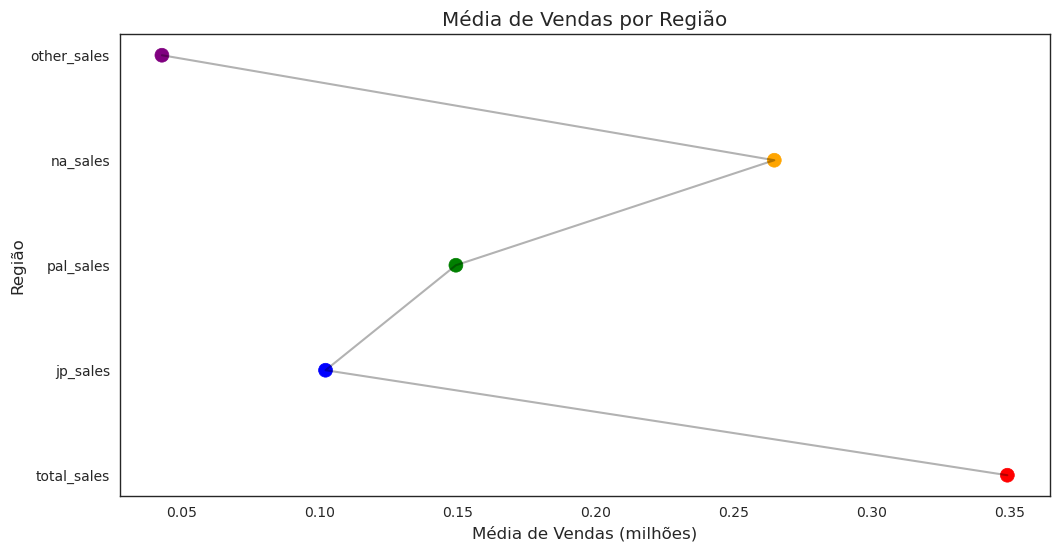

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style('white')

colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.scatter(sales_mean['mean'], sales_mean['region'], c=colors, s=100)
plt.plot(sales_mean['mean'], sales_mean['region'], color='black', alpha=0.3)

plt.xlabel('Média de Vendas (milhões)')
plt.ylabel('Região')
plt.title('Média de Vendas por Região')

plt.show()

### MEDIANA

In [ ]:
sales_median = pd.DataFrame({
  'median': [    df['total_sales(mil)'].median(),
    df['jp_sales(mil)'].median(),
    df['pal_sales(mil)'].median(),
    df['na_sales(mil)'].median(),
    df['other_sales(mil)'].median()]
}, index=['total_sales', 'jp_sales', 'pal_sales', 'na_sales', 'other_sales'])

sales_median

,median
total_sales,0.12
jp_sales,0.04
pal_sales,0.04
na_sales,0.12
other_sales,0.01


### MODA

In [ ]:
sales_mode = pd.DataFrame({
  'mode': [    df['title'].mode(),
    df['console'].mode(),
    df['genre'].mode(),
    df['publisher'].mode(),
    df['developer'].mode(),
    df['critic_score'].mode()]
}, index=['title', 'console', 'genre', 'publisher', 'developer', 'critic_score'])

sales_mode

,mode
title,0 Angry Birds: Star Wars 1 ...
console,"0 DS Name: console, dtype: object"
genre,"0 Action Name: genre, dtype: object"
publisher,"0 Activision Name: publisher, dtype: object"
developer,"0 Unknown Name: developer, dtype: object"
critic_score,"0 7.0 Name: critic_score, dtype: float64"


## MEDIDAS DE DISPERSÃO

### DESVIO PADRÃO E VARIÂNCIA

In [ ]:

colunas = ['total_sales(mil)', 'jp_sales(mil)', 'pal_sales(mil)', 'na_sales(mil)', 'other_sales(mil)']
std = df[colunas].std()

#Variância
variance = df[colunas].var()

print(std)

print("\nVariância:\n", variance)

total_sales(mil)    0.807462
jp_sales(mil)       0.168811
pal_sales(mil)      0.392653
na_sales(mil)       0.494787
other_sales(mil)    0.126643
dtype: float64

Variância:
 total_sales(mil)    0.651995
jp_sales(mil)       0.028497
pal_sales(mil)      0.154176
na_sales(mil)       0.244814
other_sales(mil)    0.016039
dtype: float64


### VARIAÇÃO INTERQUARTIL

In [ ]:

q3 = df[colunas].quantile(0.75)
q1 = df[colunas].quantile(0.25)
iqr = q3 - q1

print("Quartis:\n", df[colunas].quantile([0.25, 0.5, 0.75]))
print(f'\nVariação Interquartil:\n{iqr}')

#Verificando dados que estão abaixo de Q1 - 1.5 * IQR ou acima de Q3 + 1.5*IQR (outliers)

bottom_limit = q1 - (1.5 * iqr)
top_limit = q3 + (1.5 * iqr)

outliers = ((df[colunas] < bottom_limit) | (df[colunas] > top_limit))
df_outliers = df[outliers.any(axis=1)]
outlier_count = outliers.sum()

print(f"\nTotal de registros com pelo menos um outlier: {len(df_outliers)}\n")
print(f"Quantidade de outlier por coluna:\n{outlier_count}")

df_outliers.head()

Quartis:
       total_sales(mil)  jp_sales(mil)  pal_sales(mil)  na_sales(mil)  \
0.25              0.03           0.02            0.01           0.05   
0.50              0.12           0.04            0.04           0.12   
0.75              0.34           0.12            0.14           0.28   

      other_sales(mil)  
0.25              0.00  
0.50              0.01  
0.75              0.03  

Variação Interquartil:
total_sales(mil)    0.31
jp_sales(mil)       0.10
pal_sales(mil)      0.13
na_sales(mil)       0.23
other_sales(mil)    0.03
dtype: float64

Total de registros com pelo menos um outlier: 2972

Quantidade de outlier por coluna:
total_sales(mil)    1963
jp_sales(mil)        630
pal_sales(mil)      1409
na_sales(mil)       1210
other_sales(mil)    1931
dtype: int64


,title,console,genre,publisher,developer,critic_score,total_sales(mil),na_sales(mil),jp_sales(mil),pal_sales(mil),other_sales(mil),release_date,year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013.0
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2014.0
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,2002.0
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,2013.0
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2015.0


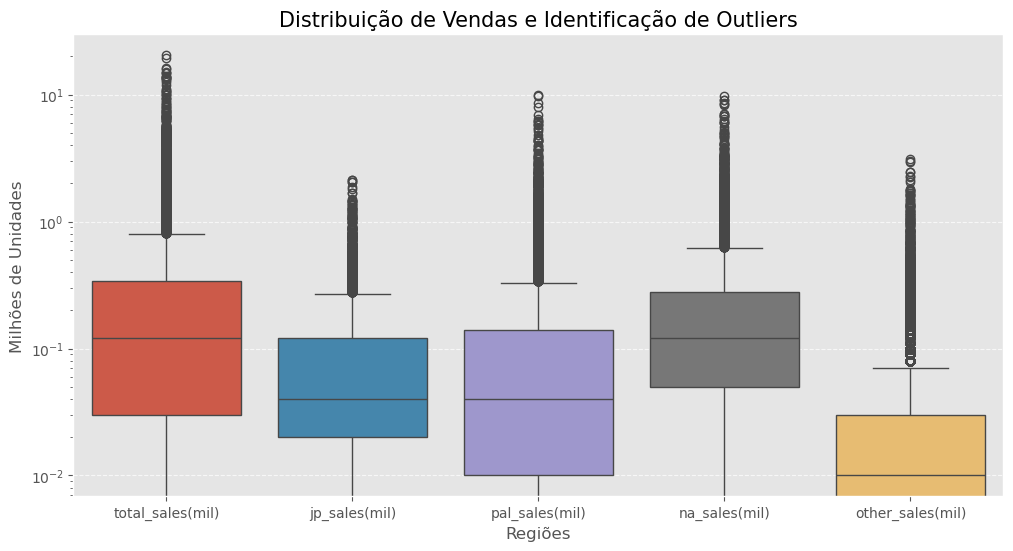

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df[colunas])

plt.title('Distribuição de Vendas e Identificação de Outliers', fontsize=15)
plt.ylabel('Milhões de Unidades')
plt.xlabel('Regiões')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')

plt.show()

# ANÁLISE EXPLORATÓRIA

## Vendas ao longo dos anos
Primeiramente, para ter uma ideia inicial de como a indústria de jogos evoluiu ao longo do tempo, faremos uma visualização do número de vendas globais ao longo dos anos,
de 1980 até 2017. Depois disso, analisaremos os 10 anos com maior número de vendas.

In [ ]:

df_anim = df.groupby('year')['global_sales'].sum().reset_index()
df_anim = df_anim.sort_values('year')

fig, ax = plt.subplots(figsize=(10, 6))

def update(i):
    ax.clear() 
    
    data = df_anim.iloc[:i+1]
    
    barras = ax.bar(data['year'], data['global_sales'], color='skyblue')
    
    ax.set_title(f'Vendas Globais até o Ano: {int(df_anim.iloc[i]["year"])}', fontsize=14)
    ax.set_ylabel('Vendas (Milhões)')
    ax.set_ylim(0, df_anim['global_sales'].max() * 1.1)
    ax.set_xlim(df_anim['year'].min() - 1, df_anim['year'].max() + 1)


ani = FuncAnimation(fig, update, frames=len(df_anim), interval=200, repeat=False)

plt.close()

HTML(ani.to_jshtml())

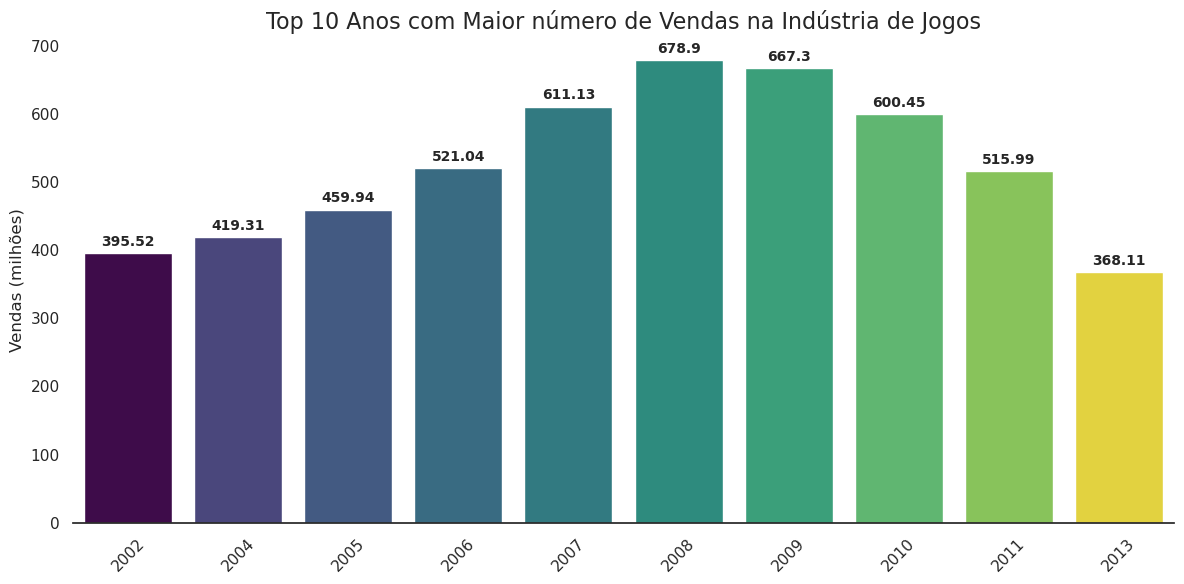

In [ ]:
sales_10 = df_anim.nlargest(10, 'global_sales')
sales_10['year'] = sales_10['year'].astype(int)

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=sales_10,
            x='year',
            y='global_sales',
            palette='viridis',
            hue='year',
            legend=False
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True)

ax.set_ylabel('Vendas (milhões)')
ax.set_xlabel('')

plt.title('Top 10 Anos com Maior número de Vendas na Indústria de Jogos', fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Jogos mais vendidos

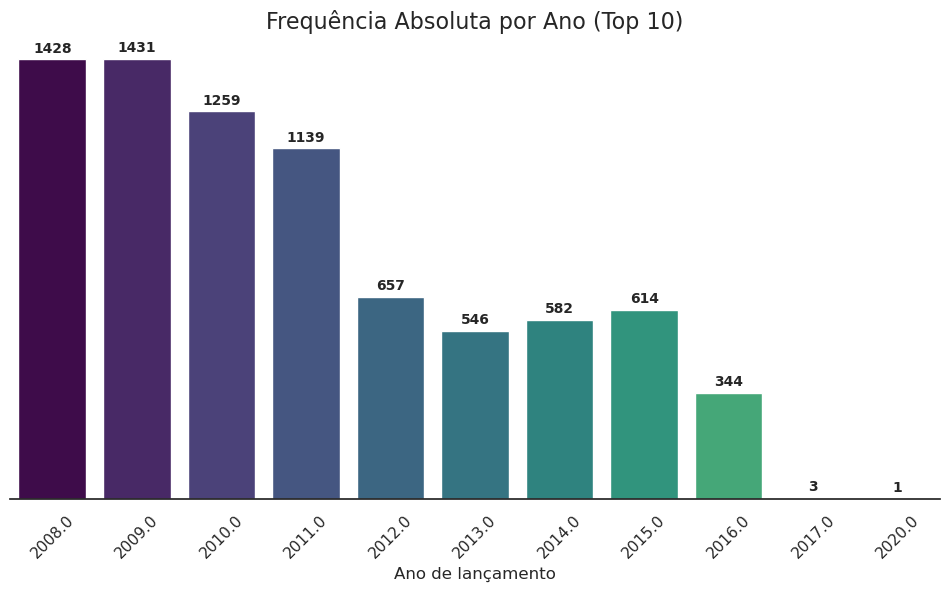

In [ ]:
plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=freq_table.loc[freq_table.year.isin(top10)],
            x='year',
            y='freq_abs',
            palette='viridis',
            hue='year',
            legend=False
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True)

ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Ano de lançamento')

plt.title('Frequência Absoluta por Ano (Top 10)', fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout
plt.show()

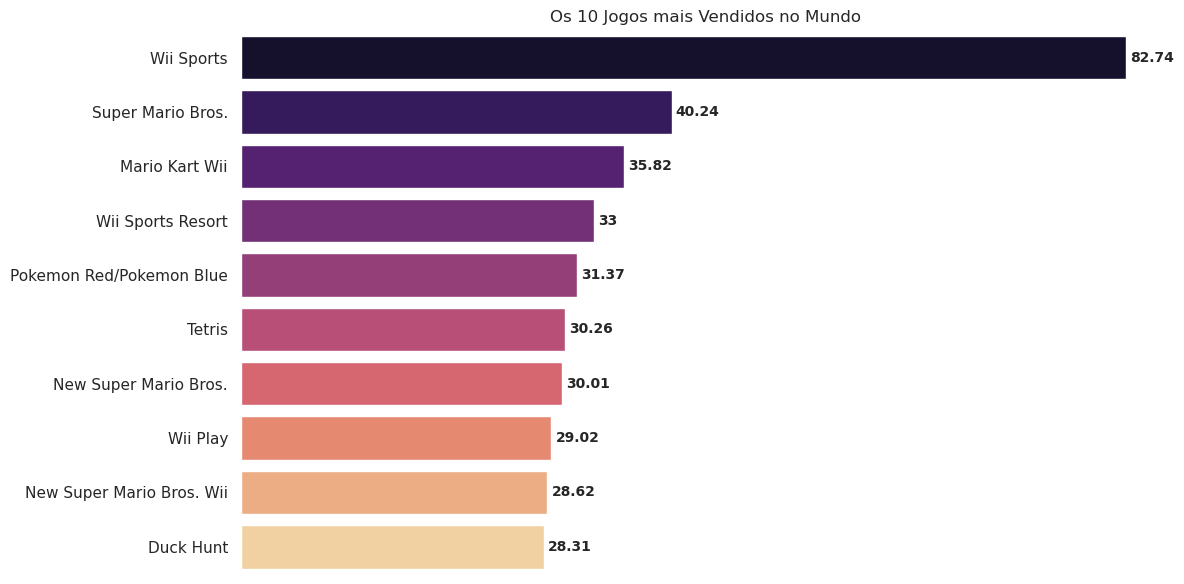

In [ ]:
import textwrap

plt.figure(figsize=(12, 6))

top10_global = df.nlargest(10, 'global_sales')
sns.set_style(style="white")

ax = sns.barplot(data=top10_global, 
                 x='global_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Os 10 Jogos mais Vendidos no Mundo")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks([])

plt.tight_layout()
plt.show()


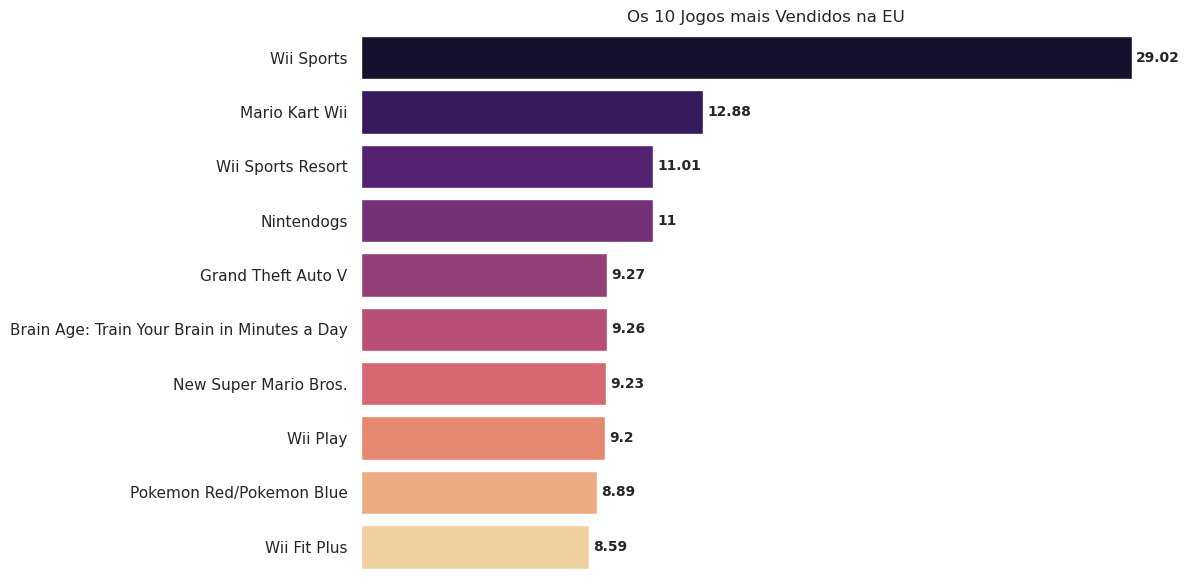

In [ ]:
plt.figure(figsize=(12, 6))

top10_eu = df.nlargest(10, 'eu_sales')

sns.set_style(style="white")

ax = sns.barplot(data=top10_eu, 
                 x='eu_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Os 10 Jogos mais Vendidos na EU")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks([])

plt.tight_layout()
plt.show()


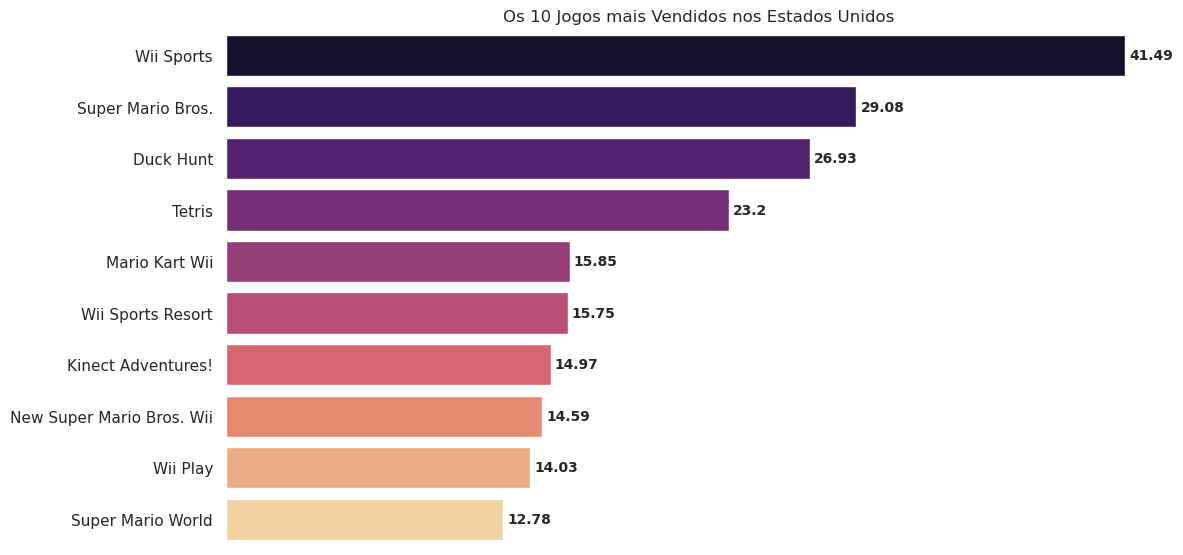

In [ ]:
plt.figure(figsize=(12, 6))

top10_na = df.nlargest(10, 'na_sales')

sns.set_style(style="white")

ax = sns.barplot(data=top10_na, 
                 x='na_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Os 10 Jogos mais Vendidos nos Estados Unidos")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.tight_layout()
plt.xticks([])

plt.show()


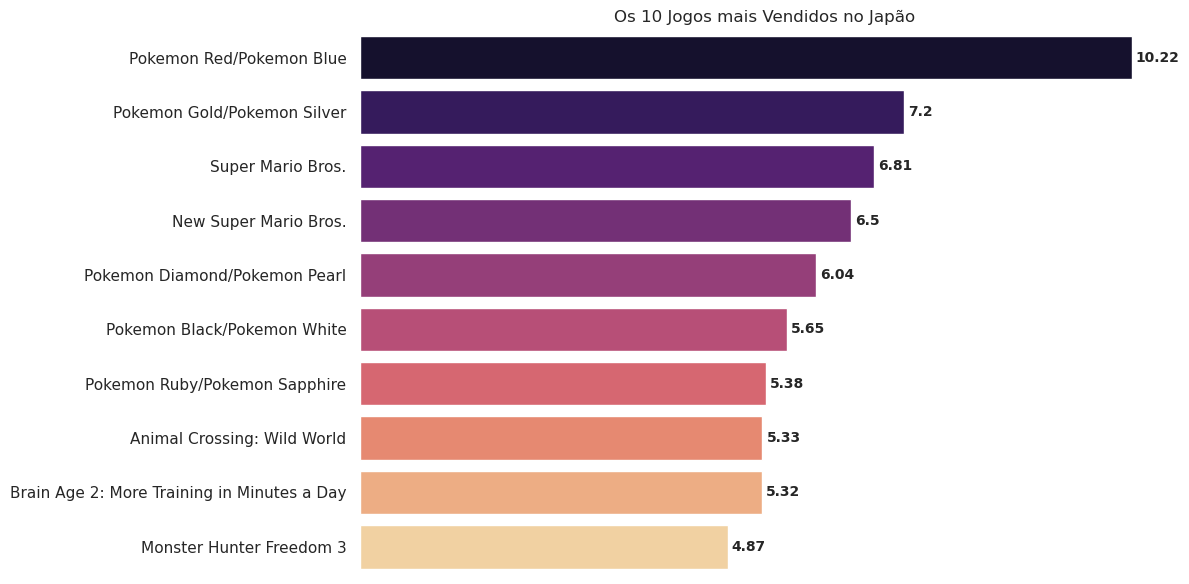

In [ ]:
plt.figure(figsize=(12, 6))

top10_jp = df.nlargest(10, 'jp_sales')

sns.set_style(style="white")

ax = sns.barplot(data=top10_jp, 
                 x='jp_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Os 10 Jogos mais Vendidos no Japão")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks([])

plt.tight_layout()
plt.show()


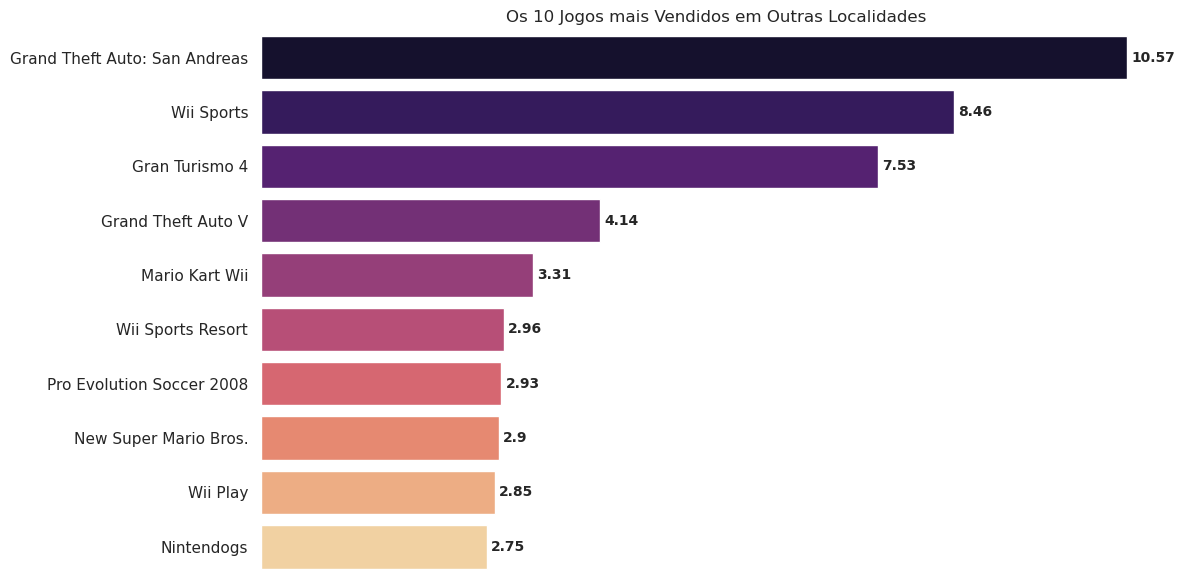

In [ ]:
plt.figure(figsize=(12, 6))

top10_other = df.nlargest(10, 'other_sales')

sns.set_style(style="white")

ax = sns.barplot(data=top10_other, 
                 x='other_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Os 10 Jogos mais Vendidos em Outras Localidades")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks([])

plt.tight_layout()


plt.show()


## Plataformas com Maior Número de Vendas

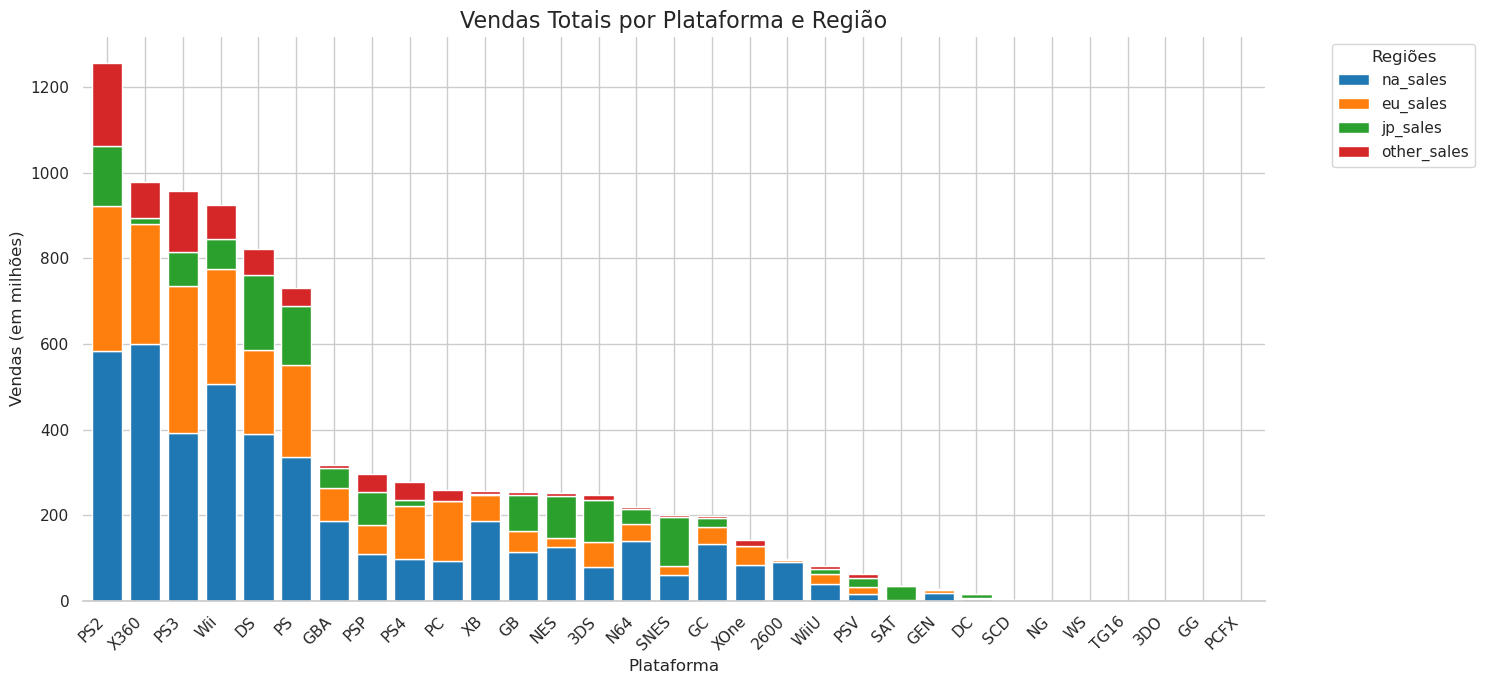

In [ ]:
grouped_sales = df.groupby('platform')[['na_sales', 'global_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
grouped_sales = grouped_sales.sort_values('global_sales', ascending=False)
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

sns.set_theme(style='whitegrid')
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

ax = grouped_sales[regions].plot(kind='bar', 
                                 stacked=True, 
                                 figsize=(15, 7), 
                                 width=0.8,
                                 color=custom_colors,
                                 edgecolor='white')

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.title('Vendas Totais por Plataforma e Região', fontsize=16)
plt.ylabel('Vendas (em milhões)')
plt.xlabel('Plataforma', fontsize=12)
plt.legend(title='Regiões', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine(left=True)

plt.tight_layout()
plt.show()



## Vendas por Gênero

In [ ]:

genre_na = df.groupby('genre')['na_sales'].sum().reset_index()

fig = px.treemap(
    genre_na,
    path=['genre'],
    values='na_sales',
    color='na_sales',
    color_continuous_scale='viridis',
    title='Vendas por Gênero na América do Norte'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:

genre_eu = df.groupby('genre')['eu_sales'].sum().reset_index()

fig = px.treemap(
    genre_eu,
    path=['genre'],
    values='eu_sales',
    color='eu_sales',
    color_continuous_scale='viridis',
    title='Vendas por Gênero na Europa'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
genre_jp = df.groupby('genre')['jp_sales'].sum().reset_index()

fig = px.treemap(
    genre_jp,
    path=['genre'],
    values='jp_sales',
    color='jp_sales',
    color_continuous_scale='viridis',
    title='Vendas por Gênero no Japão'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
genre_other = df.groupby('genre')['other_sales'].sum().reset_index()

fig = px.treemap(
    genre_other,
    path=['genre'],
    values='other_sales',
    color='other_sales',
    color_continuous_scale='viridis',
    title='Vendas por Gênero em Outras Localidades'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
genre_global = df.groupby('genre')['global_sales'].sum().reset_index()

fig = px.treemap(
    genre_global,
    path=['genre'],
    values='global_sales',
    color='global_sales',
    color_continuous_scale='viridis',
    title='Vendas por Gênero Globais'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

## Publisher

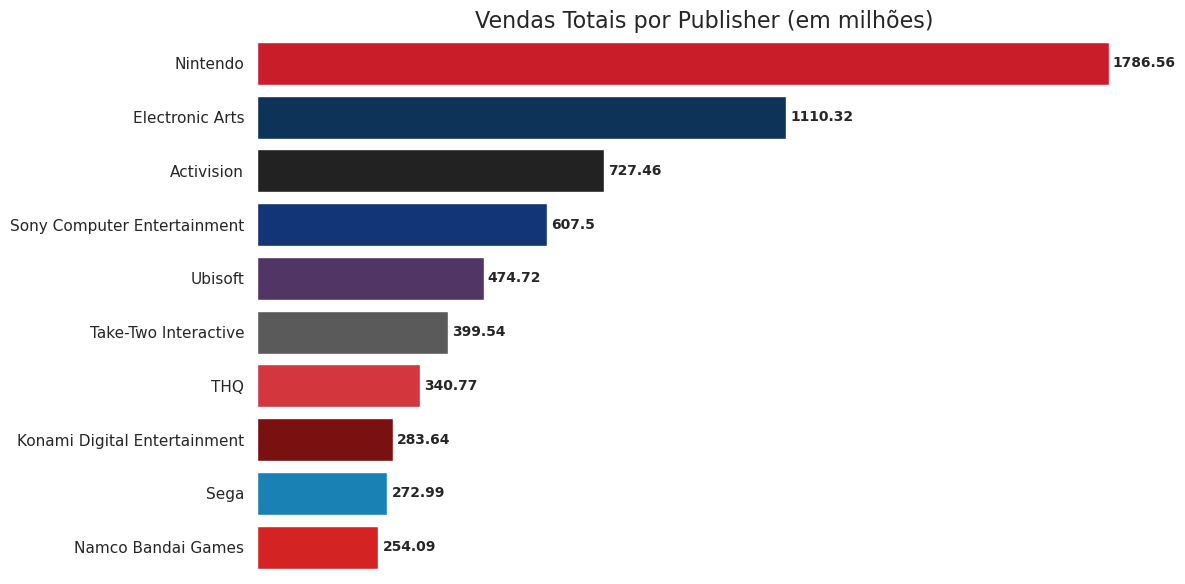

In [39]:
publisher_sales = df.groupby('publisher')['global_sales'].sum().reset_index()
publisher_sales_10 = publisher_sales.nlargest(10, 'global_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")
custom_palette = [
    '#E60012', # Nintendo (Vermelho)
    '#003366', # EA (Azul Escuro)
    '#222222', # Activision (Cinza Chumbo)
    '#003087', # Sony (Azul Royal)
    '#512D6D', # Ubisoft (Roxo Logo)
    '#5A5A5A', # Take-Two (Cinza)
    '#ED1C24', # THQ (Vermelho Vivo)
    '#8B0000', # Konami (Vinho)
    '#0089CF', # Sega (Azul Sonic)
    '#F20505'  # Namco Bandai (Laranja Avermelhado)
]

ax = sns.barplot(data=publisher_sales_10,
            x='global_sales',
            y='publisher',
            palette=custom_palette,
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Vendas Totais por Publisher (em milhões)', fontsize=16)

plt.xticks([])

plt.tight_layout()
plt.show()

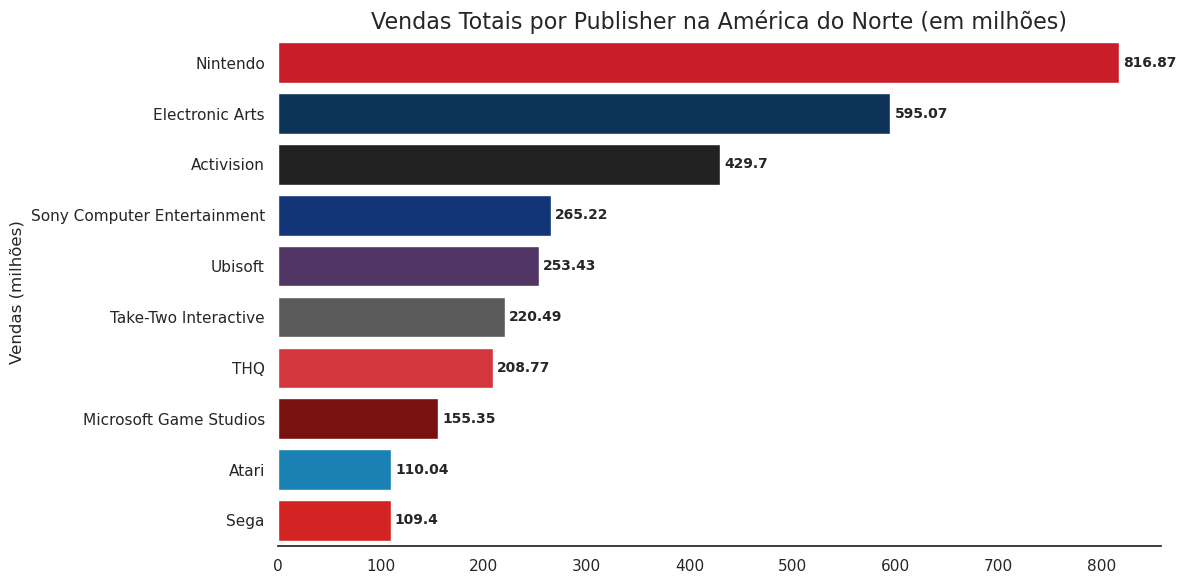

In [40]:
p_sales_na = df.groupby('publisher')['na_sales'].sum().reset_index()
p_sales_10_na = p_sales_na.nlargest(10, 'na_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")
custom_palette = [
    '#E60012',
    '#003366',
    '#222222', 
    '#003087', 
    '#512D6D', 
    '#5A5A5A', 
    '#ED1C24', 
    '#8B0000',
    '#0089CF', 
    '#F20505'  
]

ax = sns.barplot(data=p_sales_10_na,
            x='na_sales',
            y='publisher',
            palette=custom_palette,
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True)

ax.set_ylabel('Vendas (milhões)')
ax.set_xlabel('')

plt.title('Vendas Totais por Publisher na América do Norte (em milhões)', fontsize=16)

#plt.xticks(rotation=35)

plt.tight_layout()
plt.show()

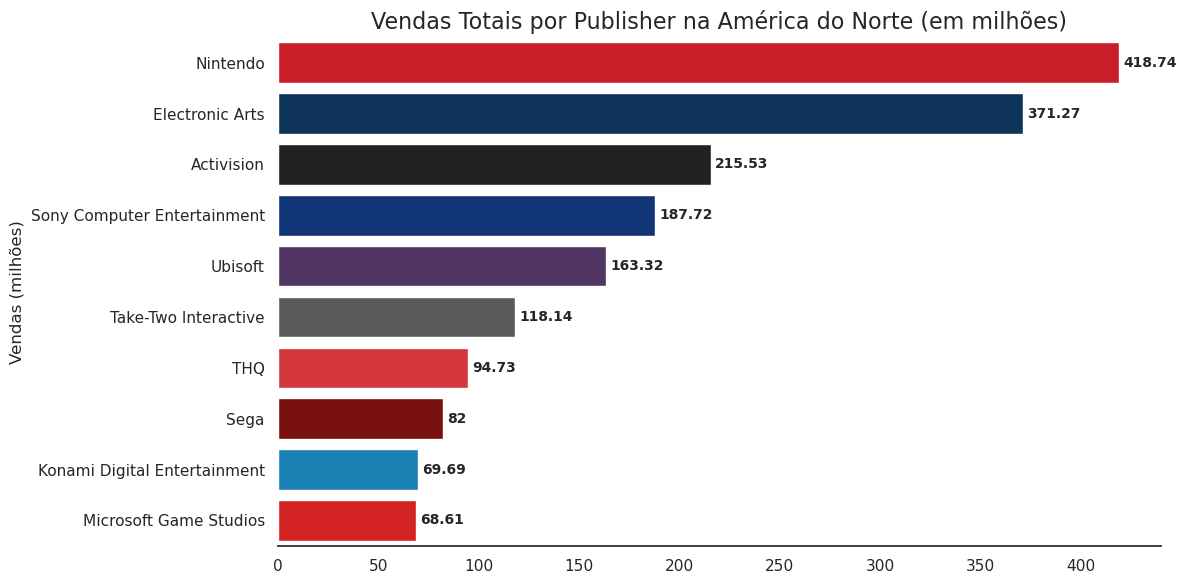

In [42]:
p_sales_eu = df.groupby('publisher')['eu_sales'].sum().reset_index()
p_sales_10_eu = p_sales_eu.nlargest(10, 'eu_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")
custom_palette = [
    '#E60012',
    '#003366',
    '#222222', 
    '#003087', 
    '#512D6D', 
    '#5A5A5A', 
    '#ED1C24', 
    '#8B0000',
    '#0089CF', 
    '#F20505'  
]

ax = sns.barplot(data=p_sales_10_eu,
            x='eu_sales',
            y='publisher',
            palette=custom_palette,
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True)

ax.set_ylabel('Vendas (milhões)')
ax.set_xlabel('')

plt.title('Vendas Totais por Publisher na América do Norte (em milhões)', fontsize=16)

#plt.xticks(rotation=35)

plt.tight_layout()
plt.show()

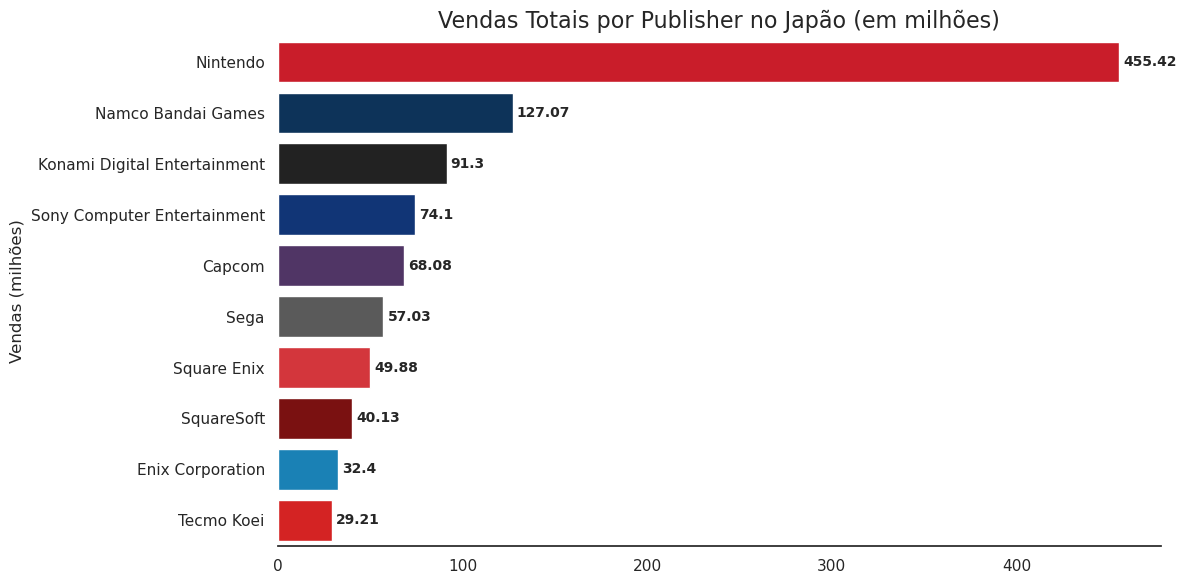

In [44]:
p_sales_jp = df.groupby('publisher')['jp_sales'].sum().reset_index()
p_sales_10_jp = p_sales_jp.nlargest(10, 'jp_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")
custom_palette = [
    '#E60012',
    '#003366',
    '#222222', 
    '#003087', 
    '#512D6D', 
    '#5A5A5A', 
    '#ED1C24', 
    '#8B0000',
    '#0089CF', 
    '#F20505'  
]

ax = sns.barplot(data=p_sales_10_jp,
            x='jp_sales',
            y='publisher',
            palette=custom_palette,
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True)

ax.set_ylabel('Vendas (milhões)')
ax.set_xlabel('')

plt.title('Vendas Totais por Publisher no Japão (em milhões)', fontsize=16)

#plt.xticks(rotation=35)

plt.tight_layout()
plt.show()

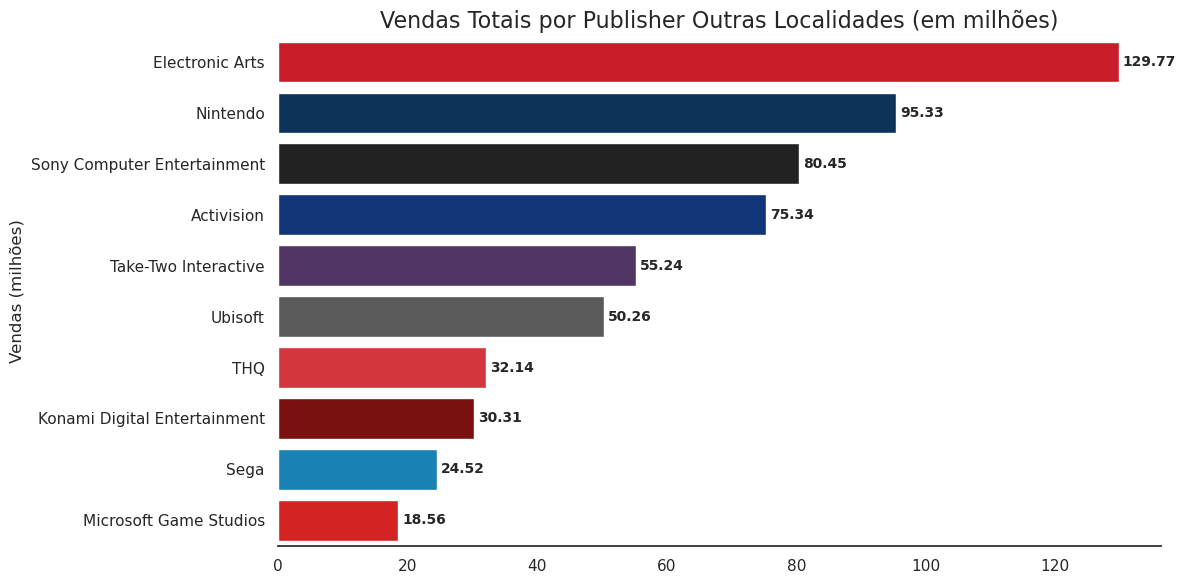

In [46]:
p_sales_other = df.groupby('publisher')['other_sales'].sum().reset_index()
p_sales_10_other = p_sales_other.nlargest(10, 'other_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")
custom_palette = [
    '#E60012',
    '#003366',
    '#222222', 
    '#003087', 
    '#512D6D', 
    '#5A5A5A', 
    '#ED1C24', 
    '#8B0000',
    '#0089CF', 
    '#F20505'  
]

ax = sns.barplot(data=p_sales_10_other,
            x='other_sales',
            y='publisher',
            palette=custom_palette,
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True)

ax.set_ylabel('Vendas (milhões)')
ax.set_xlabel('')

plt.title('Vendas Totais por Publisher Outras Localidades (em milhões)', fontsize=16)

#plt.xticks(rotation=35)

plt.tight_layout()
plt.show()

# Observações Principais e Análises Orientadas para o Mercado

## 1. Como a preferência por gêneros evoluiu em cada região nos últimos anos?

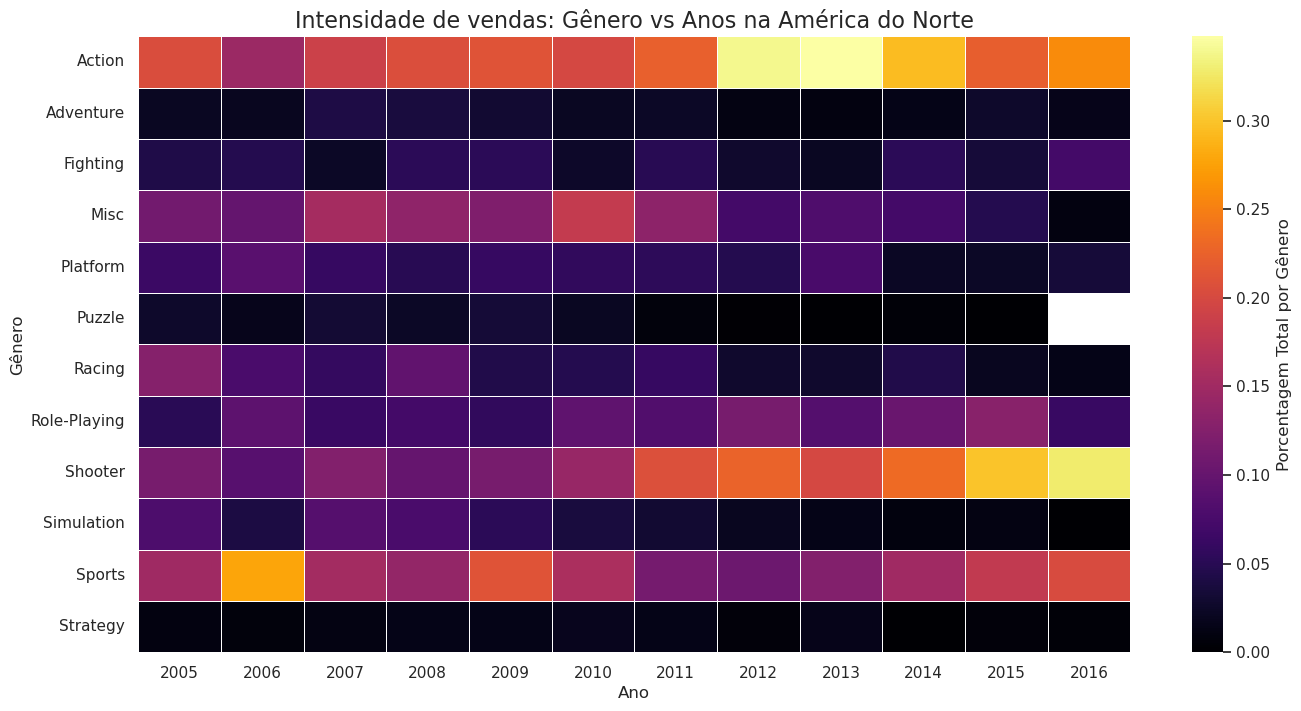

In [69]:
df_heatmap = df.groupby(['year', 'genre'])['na_sales'].sum().reset_index()
df_heatmap = df_heatmap[df_heatmap['year'] >= 2005 ]
df_heatmap['year'] = df_heatmap['year'].astype(int)

heatmap_data = df_heatmap.pivot(index='genre', columns='year', values='na_sales')
heatmap_norm = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

plt.figure(figsize=(16, 8))

sns.heatmap(heatmap_norm,
            cmap='inferno',
            annot=False,
            linewidth=0.5,
            cbar_kws={'label': 'Porcentagem Total por Gênero'})

plt.title('Intensidade de vendas: Gênero vs Anos na América do Norte', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Gênero')
plt.show()


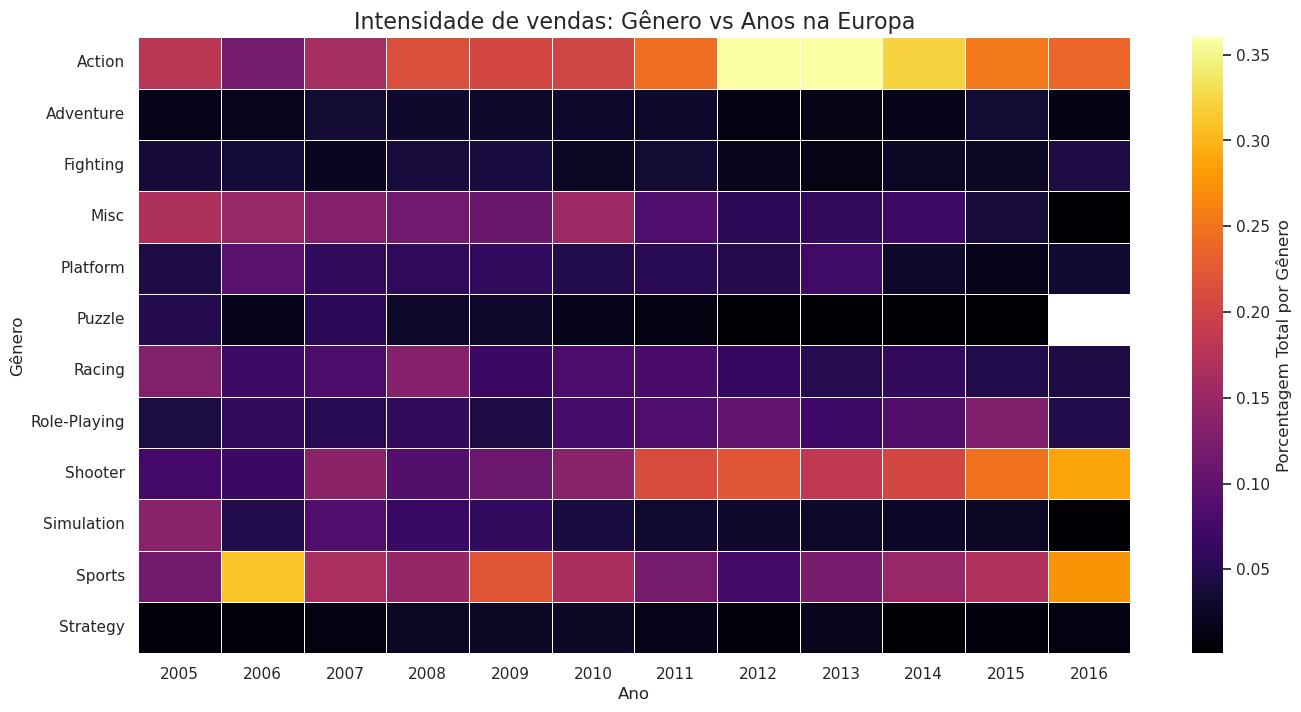

In [70]:
df_heatmap = df.groupby(['year', 'genre'])['eu_sales'].sum().reset_index()
df_heatmap = df_heatmap[df_heatmap['year'] >= 2005 ]
df_heatmap['year'] = df_heatmap['year'].astype(int)

heatmap_data = df_heatmap.pivot(index='genre', columns='year', values='eu_sales')
heatmap_norm = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

plt.figure(figsize=(16, 8))

sns.heatmap(heatmap_norm,
            cmap='inferno',
            annot=False,
            linewidth=0.5,
            cbar_kws={'label': 'Porcentagem Total por Gênero'})

plt.title('Intensidade de vendas: Gênero vs Anos na Europa', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Gênero')
plt.show()


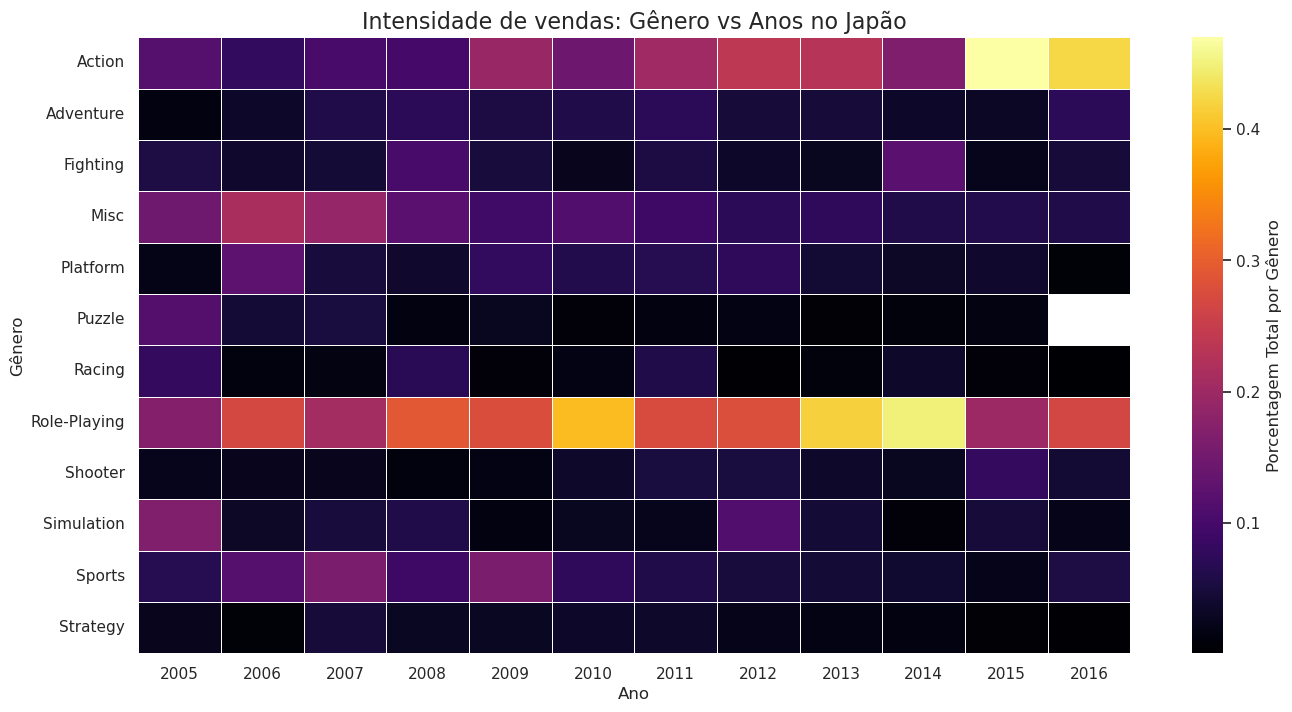

In [71]:
df_heatmap = df.groupby(['year', 'genre'])['jp_sales'].sum().reset_index()
df_heatmap = df_heatmap[df_heatmap['year'] >= 2005 ]
df_heatmap['year'] = df_heatmap['year'].astype(int)

heatmap_data = df_heatmap.pivot(index='genre', columns='year', values='jp_sales')
heatmap_norm = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

plt.figure(figsize=(16, 8))

sns.heatmap(heatmap_norm,
            cmap='inferno',
            annot=False,
            linewidth=0.5,
            cbar_kws={'label': 'Porcentagem Total por Gênero'})

plt.title('Intensidade de vendas: Gênero vs Anos no Japão', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Gênero')
plt.show()


## 2. Análise de Eficiência Histórica: Quais plataformas geraram maior valor médio por título lançado?

In [ ]:
# Agrupando por plataforma
df_eff = df.groupby('platform').agg(
    total_sales=('global_sales', 'sum'),
    num_games=('name', 'count')
).reset_index()

# Métrica eficiência (média)
df_eff['sales_per_game'] = df_eff['total_sales'] / df_eff['num_games']

#Utilziando apenas plataformas com mais de 100 jogos
df_eff = df_eff[df_eff['num_games'] >= 100].sort_values('total_sales', ascending=False)

df_eff

,platform,total_sales,num_games,sales_per_game
16,PS2,1233.46,2127,0.579906
28,X360,969.61,1235,0.785109
17,PS3,949.35,1304,0.728029
26,Wii,909.81,1290,0.705279
4,DS,818.67,2132,0.383992
15,PS,727.39,1189,0.611766
6,GBA,313.56,811,0.386634
19,PSP,291.71,1197,0.243701
18,PS4,278.07,335,0.830060
13,PC,255.05,943,0.270467


/tmp/ipykernel_624/705081014.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




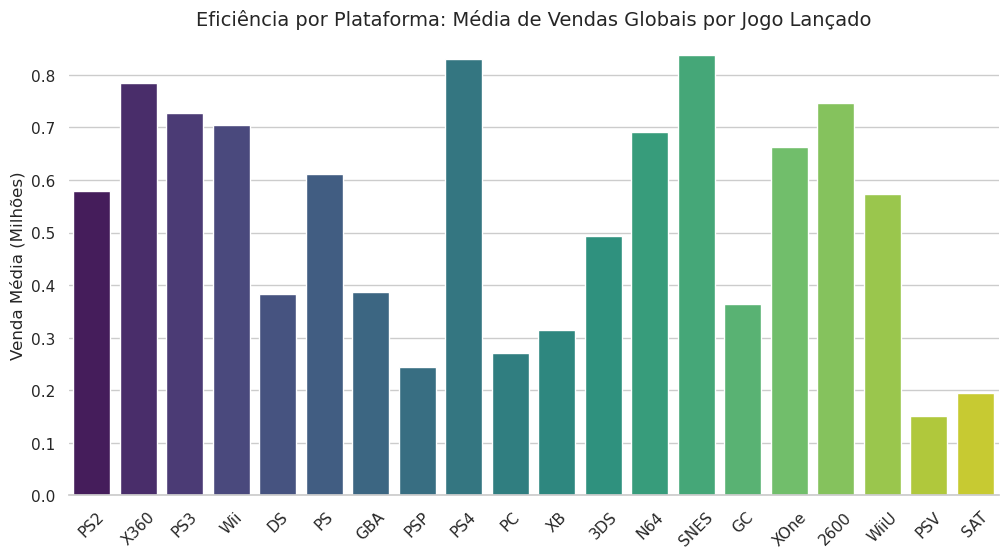

In [82]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_eff, x='platform', y='sales_per_game', palette='viridis')
plt.title('Eficiência por Plataforma: Média de Vendas Globais por Jogo Lançado', fontsize=14)
plt.ylabel('Venda Média (Milhões)')
plt.xlabel('')
plt.xticks(rotation=45)
sns.despine(left=True)

plt.show()